In [39]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

def find_latest_csv_files(base_dir='outputs', file_name='final_smiles.txt'):
    target_files = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(file_name):
                full_path = os.path.join(root, file)
                target_files.append(full_path)
    if not target_files:
        raise FileNotFoundError("No CSV files found.")
    return max(target_files, key=os.path.getmtime)

def read_smiles_from_csv(file_path, smiles_column='smiles'):
    df = pd.read_csv(file_path)
    if smiles_column not in df.columns:
        raise ValueError(f"Column '{smiles_column}' not found in CSV.")
    smiles = df[smiles_column].dropna().astype('str')
    smiles = smiles[
        (smiles.str.strip() != '') &
        (smiles.str.strip().str.lower() != 'none')
    ]
    return smiles.tolist()

file_path = find_latest_csv_files('../outputs')
smiles = read_smiles_from_csv(file_path)

def get_energy_for_smile(smile):
    mol = Chem.MolFromSmiles(smile)
    mol = Chem.AddHs(mol)

    status = AllChem.EmbedMolecule(mol, randomSeed=42)
    if status != 0:
        return np.NaN

    mmff_props = AllChem.MMFFGetMoleculeProperties(mol)

    ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props)
    if ff is None:
        return np.NaN
    energy = ff.CalcEnergy()
    return energy

energies = [get_energy_for_smile(smile) for smile in smiles]

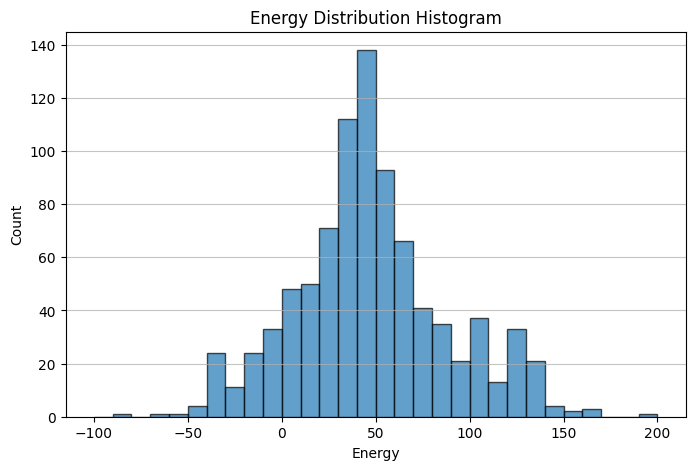

998


In [40]:
import matplotlib.pyplot as plt
bins = np.arange(-100, 201, 10)  

plt.figure(figsize=(8,5))
plt.hist(energies, bins=bins, edgecolor='black', alpha=0.7)

plt.title("Energy Distribution Histogram")
plt.xlabel("Energy")
plt.ylabel("Count")

plt.grid(axis='y', alpha=0.75)
plt.show()
print(len(energies))

In [45]:
count_not_nan = sum([not np.isnan(e) for e in energies])
print(count_not_nan)

916


In [36]:
file_path = find_latest_csv_files('../../Qm9_data_and_functions','classification_dataset.csv')
smiles = read_smiles_from_csv(file_path)
energies = [get_energy_for_smile(smile) for smile in smiles]

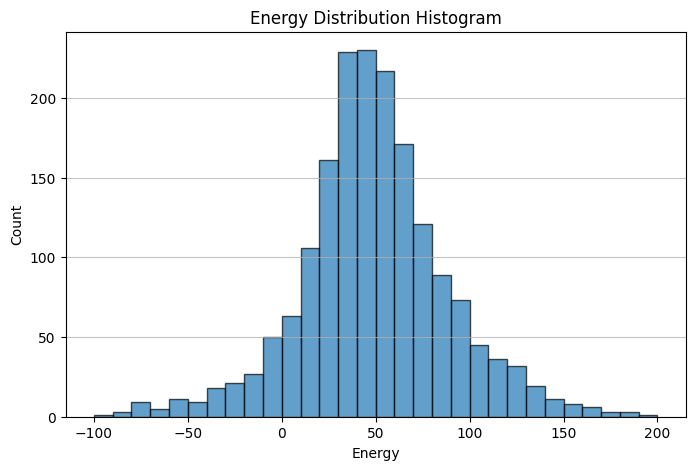

In [37]:
import matplotlib.pyplot as plt
bins = np.arange(-100, 201, 10)  

plt.figure(figsize=(8,5))
plt.hist(energies, bins=bins, edgecolor='black', alpha=0.7)

plt.title("Energy Distribution Histogram")
plt.xlabel("Energy")
plt.ylabel("Count")

plt.grid(axis='y', alpha=0.75)
plt.show()

In [38]:
print(len(energies))

2000
